# Analysis of the Titanic Shipwreck Survival

## Priyal Garg

## INTRODUCTION:

The purpose of this project is to analyze which variables affected the chances of passengers surviving when the Titanic sank in 1912. How much did gender affect who survived? Were mostly women and children given first priority to the lifeboats? Did the wealthy have a better chance of surviving than the poor? Did the location of the passenger's cabin affect their chances of survival?

Doing this analysis would perhaps help further explain what it was like to be aboard the Titanic when it was sinking and what factors led people to surviving or dying.

## GETTING THE DATA:

The first step is to get a dataset with every pokemon and its relevent stats. In order to do this, we will download a dataset from Kaggle (url: https://www.kaggle.com/datasets/ibooth1/titanic3) and import the excel file. I renamed my file from titanic3.xls to titanic.xls, but this step is not necessary.

In [104]:
import pandas as pd
pd.options.mode.chained_assignment = None # suppressing a warning
import numpy as np

# reading the excel file into a dataframe
df = pd.read_excel(r'titanic.xls')

# displaying the first few lines of the dataframe
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## DATA PREPROCESSING:

We will drop the columns that we will not be performing analysis on. In this case, we will drop `name`,`ticket`,`boat`,`body`, `home.dest`.

Additionally, we also want to check whether a passenger's cabin (AKA location on the ship) affected their chances of survival later in this tutorial. Only the cabin's letter is relevant because this tells us the approximate location of their room, so we will first fill all the missing values in `cabin` with '**N**', and then only keep the first letter of each value in the `cabin` column. So, for example, in the first row, the value '**B5**' would be changed into '**B**'. Then, we will change the values of **N** back to **NaN**.

In [105]:
# dropping all unnecessary columns
df.drop(columns=['name', 'home.dest', 'ticket', 'boat', 'body', 'embarked'],inplace=True)

# cleaning cabins column
values = {'cabin':'N'}
df.fillna(value=values, inplace=True)
df['cabin'] = df['cabin'].apply(lambda x: x[0])
df['cabin'].replace('N', np.nan, inplace=True)

# displaying cleaned and processed dataframe
df

,pclass,survived,sex,age,sibsp,parch,fare,cabin
0,1,1,female,29.0000,0,0,211.3375,B
1,1,1,male,0.9167,1,2,151.5500,C
2,1,0,female,2.0000,1,2,151.5500,C
3,1,0,male,30.0000,1,2,151.5500,C
4,1,0,female,25.0000,1,2,151.5500,C
...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,NaN
1305,3,0,female,NaN,1,0,14.4542,NaN
1306,3,0,male,26.5000,0,0,7.2250,NaN
1307,3,0,male,27.0000,0,0,7.2250,NaN


In [36]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


## DATA EXPLORATION AND VISUALIZATION:

Now, we will look at all the factors that might affect the passenger's chances of survival and visualize how much of a role they actually played.

### Survival by Gender

The most obvious factor that might play a part is gender, since women were usually let on lifeboats before men, and thus we would expect to see the average survival rates for women a lot higher than the men's. So we will create a simple bar chart to look at survival rates vs gender.

[Text(0.5, 1.0, 'Average Survival Rate vs Gender')]

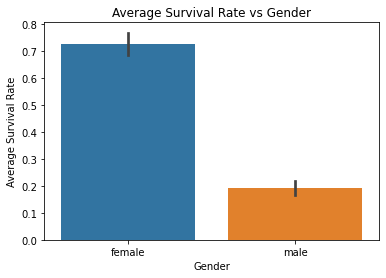

In [85]:
import seaborn as sns
ax = sns.barplot(data=df, x="sex",y="survived")
ax.set(xlabel='Gender', ylabel='Average Survival Rate')
ax.set(title='Average Survival Rate vs Gender')

Cool, this matches our expectations. 
### Survival by Age

Let's do the same for age, since children were also given priority when boarding. We will create a bar plot and compare the survival rates of people under the age of 10 and people over. The reason I chose 10 instead of 18 is because children were prioritized if they *looked* like children.

We will also take gender into account and show that as well, since the adult survival rates are very dependent on gender. We also must drop not take into account any rows where age is missing.

[Text(0.5, 1.0, 'Average Survival Rate vs Child or Adult')]

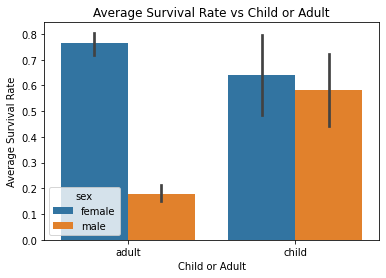

In [71]:
df_age = df[df['age'].notna()]
df_age['child_or_adult'] = df['age'].apply(lambda x: 'child' if x < 10 else 'adult')

ax = sns.barplot(data=df_age, x="child_or_adult",y="survived",hue="sex")
ax.set(xlabel='Child or Adult', ylabel='Average Survival Rate')
ax.set(title='Average Survival Rate vs Child or Adult')

Interesting. So a women's survival rate was actually higher than children's. Another point of interest is that a non-adult girl was more likely to survive than a non-adult boy by a small margin.

### Survival by Ticket Class

Next, we will look at whether there's a correlation between ticket class and survival. Ticket class on the Titanic determined how many accomodations you were given and where you would stay on the ship. First class paid much higher rates, but had larger rooms, more refined food, and more importantly, lived closer to the top of the ship. Second class paid less and had rooms in the middle of the ship. Third class paid the least (hence were usually the poorest), and lived towards the bottom of the ship.

[Text(0.5, 1.0, 'Average Survival Rate for each Ticket Class')]

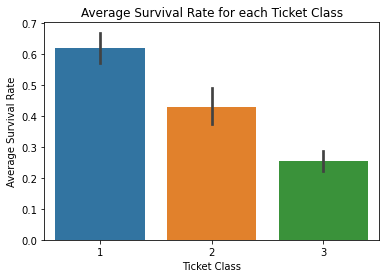

In [72]:
ax = sns.barplot(data=df, x='pclass',y='survived')
ax.set(xlabel='Ticket Class', ylabel='Average Survival Rate')
ax.set(title='Average Survival Rate for each Ticket Class')

Yikes, pretty visible downwards trend.
### Survival by Cabin

We'll now look at survival rates based on cabin. The ship was organized such that the cabin letters that were first in the alphabet were on a higher level on the ship. So **A** was on top, and **G** was near the bottom. **T** was the boiler room level. 

You can look at a detailed layout of the titanic by following this link: https://en.wikipedia.org/wiki/First-class_facilities_of_the_Titanic

[Text(0.5, 1.0, 'Average Survival Rate for each Cabin')]

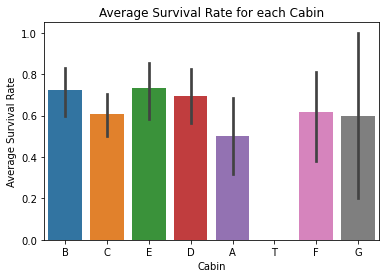

In [73]:
df_cab = df[df['cabin'].notna()]
ax = sns.barplot(data=df_cab, x='cabin',y="survived")
ax.set(xlabel='Cabin', ylabel='Average Survival Rate')
ax.set(title='Average Survival Rate for each Cabin')

This is surprising! **A** had one of the lowest survival rates. It seems that **T** had a 0 survival rate. Let's double-check that:

In [74]:
df['cabin'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: cabin, dtype: int64

Ah, so there's only 1 available datapoint for Cabin **T**, which makes this an unreliable indicator for survival rates. Otherwise, the survival rates don't seem to follow a very distinct trend.

## ANALYSIS, HYPOTHESIS TESTING AND MACHINE LEARNING:

Now that we have gotten a good handle of what our data looks like and what trends might exist, we can move onto analysis and modeling.

First, it might be a good idea to concretely determine which variables have the greatest effect on survival rate. In order to do this, we may fit our data to a Random Forest Classifier and use the `feature_importances_` attribute to visualize which variables have a concrete correlation to survival rates.

To read more about Random Forest Classification, you can follow this link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Before we fit our data to this model, we must convert the `sex` column into numbers instead of names. 0 will represent female, and 1 will represent male. We must also drop columns that have `NaN` values.

In [106]:
#RANDOM FOREST CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier

# dropping NaN values and translating female/male into binary numbers
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)
df.dropna(inplace=True)

rf_clf = RandomForestClassifier()
rf_clf.fit(df[['sex','age','pclass','sibsp','parch','fare']],df['survived'])

RandomForestClassifier()

Text(0.5, 1.0, 'The Relative Importance of Each Variable that Affects Survival')

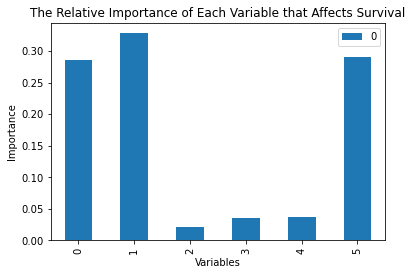

In [107]:
# graphing feature importance
import matplotlib.pyplot as plt

f, ax = plt.subplots()
pd.DataFrame(rf_clf.feature_importances_).plot.bar(ax=ax)
ax.set_ylabel('Importance')
ax.set_xlabel('Variables')
ax.set_title('The Relative Importance of Each Variable that Affects Survival')

This graph shows us that sex, age and fare played the biggest roles in survival rate. This is important to keep in mind when we create our final model because we should only analyze data that are truly relevant.

Now, we may perform a simple logistic regression on all the most significant factors that affected survival chances. 

To find more information about logistic regression, visit this link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [118]:
# logistic regression with the three most important variables
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression() 

log_clf.fit(df[['sex','age','fare']],df['survived'])
print("R^2:",log_clf.score(df[['sex','age','fare']],df['survived']))

R^2: 0.7941176470588235


Alright, that's pretty good! Let's add the rest of the variables to see if the score is better or not.

In [116]:
# logistic regression with all variables
log_clf2 = LogisticRegression() 

log_clf2.fit(df[['sex','age','pclass','sibsp','parch','fare']],df['survived'])
print("R^2:",log_clf2.score(df[['sex','age','pclass','sibsp','parch','fare']],df['survived']))

R^2: 0.7977941176470589


That's slightly better! So while sex, age and fare were definitely the most important variables that determined survival rate, the other three also played a small role, which made our second model slightly better.

## INSIGHT AND CONCLUSION:

Through this analysis, we were able to determine whether there existed correlations between survival rate of a Titanic passenger and certain variables like age, gender and fare (and thus, wealth status). This analysis really opens our eyes about how women and wealthy people were unfairly given an advantage and how drastic the disparity was if someone did not have these advantages. 